In [1]:
import pandas as pd
import numpy as np


In [2]:
#  į dataframe

brent = pd.read_csv('BrentOilPrices.csv')

In [3]:
brent

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8355,"Apr 15, 2020",19.80
8356,"Apr 16, 2020",18.69
8357,"Apr 17, 2020",19.75
8358,"Apr 20, 2020",17.36


In [4]:
# .info
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8360 entries, 0 to 8359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8360 non-null   object 
 1   Price   8360 non-null   float64
dtypes: float64(1), object(1)
memory usage: 130.8+ KB


In [5]:
brent.head(1)

,Date,Price
0,20-May-87,18.63


In [6]:
brent.tail(1)

,Date,Price
8359,"Apr 21, 2020",9.12


In [7]:
brent = pd.read_csv('BrentOilPrices.csv', parse_dates=["Date"])

C:\Users\rezav\AppData\Local\Temp\ipykernel_22432\331134767.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent = pd.read_csv('BrentOilPrices.csv', parse_dates=["Date"])


In [8]:
brent.head(5)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


<Axes: xlabel='Date'>

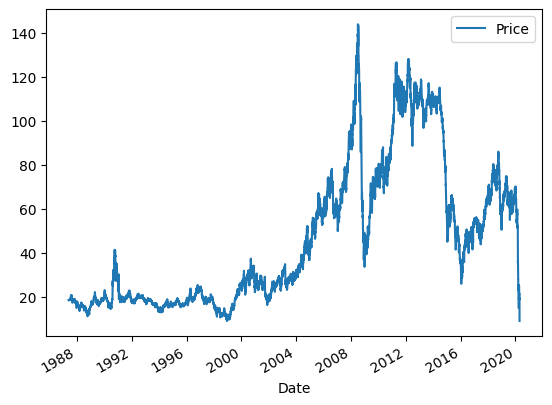

In [10]:
#  integruotas pandas .plot metodas:
brent.plot(x="Date")

In [11]:
ru = pd.read_csv('RU.csv', parse_dates=['Date'])
ru.head()

,Date,Open,High,Low,Close
0,1995-10-23,4.5065,4.5065,4.5065,4.5065
1,1995-10-24,4.5060,4.5060,4.5060,4.5060
2,1995-10-25,4.5060,4.5060,4.5060,4.5060
3,1995-10-26,4.5090,4.5090,4.5090,4.5090
4,1995-10-27,4.5130,4.5130,4.5130,4.5130


<Axes: xlabel='Date'>

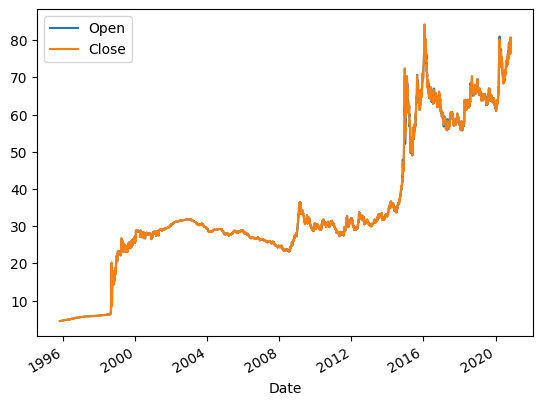

In [16]:
ru.plot(x='Date', y=['Open','Close'])

In [18]:
dus14 = pd.read_csv('Dus2014.csv')
dus14.head(2)

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,nuosavybe,bdu_val,nuts,vv_darb_sk,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,35.03,0,0.58,XL,0,1_49,20-29,0,A,0,...,B,6.0,LT,6,0,0,6.0,0,1,G4
1,2.39,0,0.54,XN,0,1_49,20-29,0,A,0,...,B,6.0,LT,12,0,0,6.0,0,2,G2


In [25]:
bdu_spalio = dus14['bdu_spalio'].values
print(bdu_spalio)
print(bdu_spalio.mean())
print(np.mean(bdu_spalio))
print(np.median(bdu_spalio))

[   6.    6.    6. ... 3670. 4212. 4218.]
2366.8490910304326
2366.8490910304326
1938.0


In [47]:
#  kelių stulpelių pasirinkimas
d14small = dus14[['lytis', 'amzius', 'bdu_spalio', 'issilavinimas', 'profesija', 'bdu_metinis']]
print(d14small)

      lytis amzius  bdu_spalio issilavinimas  profesija  bdu_metinis
0         M  20-29        6.00            G4        261        22.00
1         F  20-29        6.00            G2        334        22.00
2         F  40-49        6.00            G4        221        22.00
3         F  30-39        6.00            G4        332        32.67
4         M  40-49       11.33            G2        962        32.67
...     ...    ...         ...           ...        ...          ...
44947     F  50-59     3393.00            G4        235     42616.67
44948     F  30-39     3639.67            G4        233     35417.67
44949     F  50-59     3670.00            G4        231     42509.00
44950     F  30-39     4212.00            G4        231     46175.00
44951     F  40-49     4218.00            G4        231     43820.67

[44952 rows x 6 columns]


In [32]:
# duomenų atranka:
f14 = d14small[d14small['lytis'] == 'F']
f14.head(7)

,lytis,amzius,bdu_spalio,issilavinimas,profesija
1,F,20-29,6.00,G2,334
2,F,40-49,6.00,G4,221
3,F,30-39,6.00,G4,332
7,F,20-29,13.33,G2,531
10,F,40-49,10.00,G3,334
12,F,30-39,6.00,G4,241
13,F,20-29,9.00,G3,332


In [34]:
f14vid = f14['bdu_spalio'].mean()
f14mediana = f14['bdu_spalio'].median()
print(f14vid, f14mediana, sep='\n')

2097.379658410087
1751.0


In [37]:
# koks buvo vyrų ir moterų vidutinis atlyginimas 2014 metais?
# rezulataą išspausdinkite vienas šalia kito:
# pvz 
# Vyrų x, moterų y atlyginimai

d14smallMF = dus14[['lytis', 'bdu_spalio']]

F14 = d14smallMF[d14smallMF['lytis'] == 'F']
M14 = d14smallMF[d14smallMF['lytis'] == 'M']

F14vid = F14['bdu_spalio'].mean()
M14vid = M14['bdu_spalio'].mean()
print('Moterų vidutinis atlyginimas: ', F14vid, 'Vyrų vidutinis atlyginimas', M14vid, sep='\n')

Moterų vidutinis atlyginimas: 
2097.379658410087
Vyrų vidutinis atlyginimas
2633.693743912158


In [38]:
# and operatoriai:
# atrinkti tik vyrus, kurių išsilavinimas pažymėtas G3

M14G3 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G3')]
M14G3.head(5)

,lytis,amzius,bdu_spalio,issilavinimas,profesija
11,M,20-29,9.67,G3,315
18,M,60+,6.00,G3,312
19,M,20-29,6.00,G3,333
21,M,20-29,28.67,G3,241
25,M,50-59,6.00,G3,261


In [39]:
# or operatoriai:
# atrinkti tik vyrus, kurių išsilavinimas pažymėtas G3

M14G3 = d14small[(d14small['lytis'] == 'M') | (d14small['issilavinimas'] == 'G3')]
M14G3.head(5)

,lytis,amzius,bdu_spalio,issilavinimas,profesija
0,M,20-29,6.00,G4,261
4,M,40-49,11.33,G2,962
5,M,30-39,6.00,G2,122
6,M,60+,6.00,G4,221
8,M,20-29,6.67,G1,912


In [50]:
#  atrinkti tik vyrus pagal išsulavinimą G1, G2, G3, G4 ir surasti jų vidutinius atlyginimus
# spausdinti taip:
# G1 x
# G2 y

M14G1 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G1')]
M14G1BduVid = M14G1['bdu_spalio'].mean()
print('G1 spalį gauna:', M14G1BduVid)

M14G2 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G2')]
M14G2BduVid = M14G2['bdu_spalio'].mean()
print('G2 spalį gauna:', M14G2BduVid)

M14G3 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G3')]
M14G3BduVid = M14G3['bdu_spalio'].mean()
print('G3 spalį gauna:', M14G3BduVid)

M14G4 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G4')]
M14G4BduVid = M14G4['bdu_spalio'].mean()
print('G4 spalį gauna:', M14G4BduVid)



G1 spalį gauna: 1762.3009536541888
G2 spalį gauna: 2129.485699084385
G3 spalį gauna: 2900.4601477312694
G4 spalį gauna: 4158.559151846785


In [49]:
M14G1 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G1')]
M14G1BduVid = M14G1['bdu_metinis'].mean()
print('G1 2014 m. gauna:', M14G1BduVid)

M14G2 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G2')]
M14G2BduVid = M14G2['bdu_metinis'].mean()
print('G2 2014 m. gauna:', M14G2BduVid)

M14G3 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G3')]
M14G3BduVid = M14G3['bdu_metinis'].mean()
print('G3 2014 m. gauna:', M14G3BduVid)

M14G4 = d14small[(d14small['lytis'] == 'M') & (d14small['issilavinimas'] == 'G4')]
M14G4BduVid = M14G4['bdu_metinis'].mean()
print('G4 2014 m. gauna:', M14G4BduVid)

G1 2014 m. gauna: 16627.79112299465
G2 2014 m. gauna: 22117.661825455747
G3 2014 m. gauna: 32803.473422441086
G4 2014 m. gauna: 50093.747556771545


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dus14 = pd.read_csv('DUS2014.csv')
dus18 = pd.read_csv('DUS2018.csv')

In [7]:
d14s = dus14[['lytis', 'amzius', 'issilavinimas', 'bdu_spalio', 'profesija']]

In [8]:
d14s

,lytis,amzius,issilavinimas,bdu_spalio,profesija
0,M,20-29,G4,6.00,261
1,F,20-29,G2,6.00,334
2,F,40-49,G4,6.00,221
3,F,30-39,G4,6.00,332
4,M,40-49,G2,11.33,962
...,...,...,...,...,...
44947,F,50-59,G4,3393.00,235
44948,F,30-39,G4,3639.67,233
44949,F,50-59,G4,3670.00,231
44950,F,30-39,G4,4212.00,231


In [9]:
# prideti nauja stulpeli
bdu_spalio = d14s['bdu_spalio'].values
bdu_eurais = bdu_spalio/3.4528
d14s['bdu€'] = bdu_eurais
d14s.head(10)

# d14s['bdu€'] = d14s['bdu_spalio']/3.4528 #

C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\4264616852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d14s['bdu€'] = bdu_eurais


,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
0,M,20-29,G4,6.00,261,1.737720
1,F,20-29,G2,6.00,334,1.737720
2,F,40-49,G4,6.00,221,1.737720
3,F,30-39,G4,6.00,332,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
7,F,20-29,G2,13.33,531,3.860635
8,M,20-29,G1,6.67,912,1.931766
9,M,40-49,G2,6.00,332,1.737720


In [10]:
#  .query()
d14s.query('lytis == "M"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
0,M,20-29,G4,6.00,261,1.737720
4,M,40-49,G2,11.33,962,3.281395
5,M,30-39,G2,6.00,122,1.737720
6,M,60+,G4,6.00,221,1.737720
8,M,20-29,G1,6.67,912,1.931766
...,...,...,...,...,...,...
44925,M,40-49,G4,7849.67,134,2273.421571
44927,M,30-39,G4,1793.00,231,519.288693
44931,M,50-59,G4,3246.00,232,940.106580
44934,M,60+,G4,3819.67,231,1106.252896


In [11]:
d14s.query('lytis == "M" and issilavinimas == "G3"')

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€
11,M,20-29,G3,9.67,315,2.800626
18,M,60+,G3,6.00,312,1.737720
19,M,20-29,G3,6.00,333,1.737720
21,M,20-29,G3,28.67,241,8.303406
25,M,50-59,G3,6.00,261,1.737720
...,...,...,...,...,...,...
44805,M,40-49,G3,3685.00,233,1067.249768
44808,M,60+,G3,2692.00,235,779.657090
44843,M,20-29,G3,1625.00,235,470.632530
44914,M,40-49,G3,3444.33,234,997.546918


In [12]:
edu = input("Įveskite išsilavinimo kodą (G1, G2, G3, G4)")
ats = d14s.query('issilavinimas == @edu') # @ !!!!!!!! ie6ko kode iki sios eilutes
ats.head(3)

,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€


In [13]:
# parašykite for ciklą, kuris išspausdintų išsilavinimo kodą ir vidutinį atlyginimą
# respondentų su tuo išsilavinimo kodu.
# naudokite .query() metodą
edus = ['G1', 'G2', 'G3', 'G4']
for i in edus:
    g = d14s.query('issilavinimas == @i')['bdu€'].mean()
print(i, g)

G4 1011.9653972982893


In [14]:
def ltlToEuro(litas):
    euras = litas/3.45280
    return euras

d14s['Eurai iš funkcijos'] = d14s['bdu_spalio'].apply(ltlToEuro)
d14s.head(6)


C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\4238558751.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d14s['Eurai iš funkcijos'] = d14s['bdu_spalio'].apply(ltlToEuro)


,lytis,amzius,issilavinimas,bdu_spalio,profesija,bdu€,Eurai iš funkcijos
0,M,20-29,G4,6.00,261,1.737720,1.737720
1,F,20-29,G2,6.00,334,1.737720,1.737720
2,F,40-49,G4,6.00,221,1.737720,1.737720
3,F,30-39,G4,6.00,332,1.737720,1.737720
4,M,40-49,G2,11.33,962,3.281395,3.281395
5,M,30-39,G2,6.00,122,1.737720,1.737720


In [15]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])
nypd.head(2)

C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\3580730019.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_DATE', 'OCCUR_TIME'])


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,201575314,2019-08-23,2024-04-11 22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141
1,205748546,2019-11-27,2024-04-11 15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571


In [16]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
nypd.head(3)
# .dt modulis, veikia tik tada, jei
#  stulpelis DataFrame yra datetime tipo
nypd_small = nypd[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG']]
nypd_small.head()
nypd_small['MonthNr'] = nypd_small['DATA'].dt.month
nypd_small['Hour'] = nypd_small['DATA'].dt.hour
nypd_small['HR'] = nypd_small['DATA'].dt.round('H').dt.hour
nypd_small['MthName'] = nypd_small['DATA'].dt.month_name()
nypd_small.head(3)

C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\3294748692.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})
C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\3294748692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nypd_small['MonthNr'] = nypd_small['DATA'].dt.month
C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\3294748692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February


In [17]:
# sukurkite du naujus stulpelius
# viename turi būti paros laikas ('Rytas, Vakaras, etc)
# kitame metų laikas (žiema, vasara, etc)
# naudokite stulpelius Hour ir MonthNr
def para(x):
    if x >= 22 or x < 6:
        return 'Naktis'
    elif x >= 6 and x < 10:
        return 'Rytas'
    elif x >= 10 and x < 16:
        return 'Diena'
    else:
        return 'Vakaras'

def metai(x):
    if x in [12,1,2]:
        return 'Žiema'
    elif x in [3,4,5]:
        return 'Pavasaris'
    elif x in [6,7,8]:
        return 'Vasara'
    else:
        return 'Ruduo'

nypd_small['ParosL'] = nypd_small['Hour'].apply(para)
nypd_small['MetųL'] = nypd_small['MonthNr'].apply(metai)
nypd_small.head()

C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\1206668426.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nypd_small['ParosL'] = nypd_small['Hour'].apply(para)
C:\Users\rezav\AppData\Local\Temp\ipykernel_12948\1206668426.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nypd_small['MetųL'] = nypd_small['MonthNr'].apply(metai)


,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,Vakaras,Žiema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August,Vakaras,Vasara


In [18]:
nypd_small['MthName'].value_counts() # kiek kartu pasikartojo konkrecios vertes: pirmas stulpelis index, antras values

MthName
July         2482
August       2462
June         2192
May          2037
September    2033
October      1851
December     1601
April        1578
November     1550
January      1411
March        1331
February     1098
Name: count, dtype: int64

In [19]:
nypd_small['MthName'].value_counts().sort_values(ascending=True)

MthName
February     1098
March        1331
January      1411
November     1550
April        1578
December     1601
October      1851
September    2033
May          2037
June         2192
August       2462
July         2482
Name: count, dtype: int64

In [22]:
nypd_small['MthName'].value_counts().sort_index(ascending=True)

MthName
April        1578
August       2462
December     1601
February     1098
January      1411
July         2482
June         2192
March        1331
May          2037
November     1550
October      1851
September    2033
Name: count, dtype: int64

In [23]:
shootings = nypd_small['MthName'].value_counts()
months = shootings.index
counts = shootings.values
print(months, counts, sep='\n')

Index(['July', 'August', 'June', 'May', 'September', 'October', 'December',
       'April', 'November', 'January', 'March', 'February'],
      dtype='object', name='MthName')
[2482 2462 2192 2037 2033 1851 1601 1578 1550 1411 1331 1098]


In [24]:
nypd_small['MonthNr'].value_counts().sort_index(ascending=True)

MonthNr
1     1411
2     1098
3     1331
4     1578
5     2037
6     2192
7     2482
8     2462
9     2033
10    1851
11    1550
12    1601
Name: count, dtype: int64

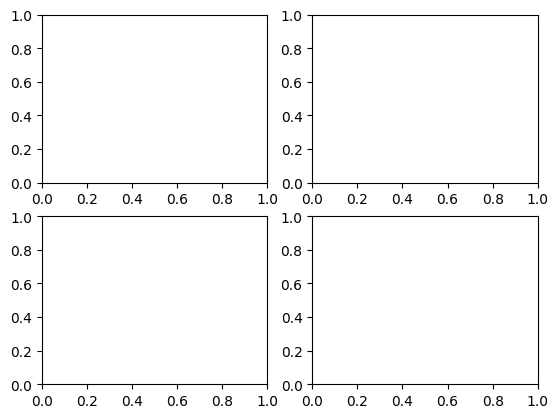

In [27]:
#  plt.subplots():
langas, grafikas = plt.subplots(2,2)

plt.show()

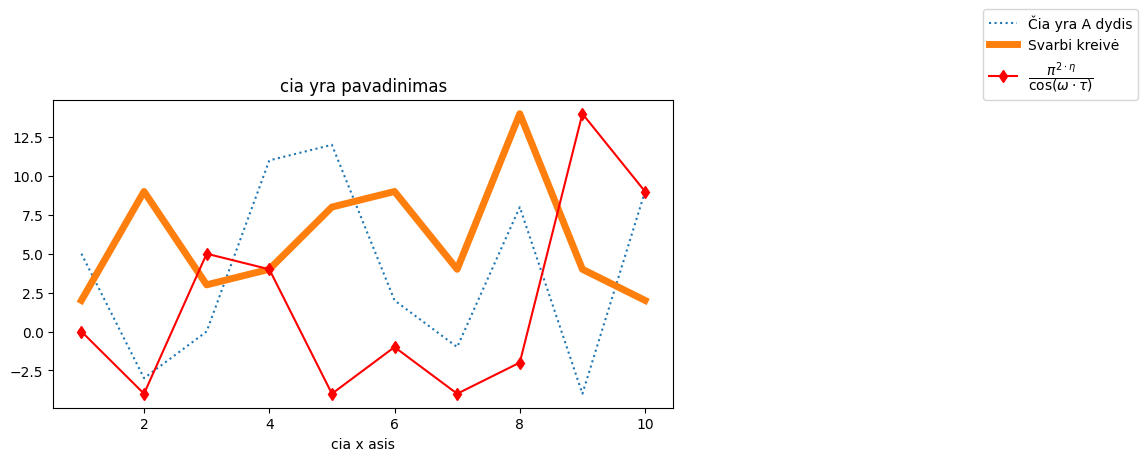

In [44]:
a = np.arange(1,11)
b = np.random.randint(-5, 15, 10)
c = np.random.randint (-5, 15, 10)
d = np.random.randint (-5, 15, 10)
langas, grafikas = plt.subplots(figsize=[8,4])
# .plot() metodas
grafikas.plot(a,b, label="Čia yra A dydis", linestyle = ':')
grafikas.plot(a,c, label="Svarbi kreivė", linewidth = 5)
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$', marker = 'd', color = "red")

grafikas.set_xlabel("cia x asis")
grafikas.set_title('cia yra pavadinimas')

# grafikas.legend(loc='best')
grafikas.legend(loc=[1.5,1])

plt.show()
# 'best', 'upper right', 'upper left', 'lower left',
# 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center

In [ ]:
a = np.arange(1,11)
b = np.random.randint(-5, 15, 10)
c = np.random.randint (-5, 15, 10)
d = np.random.randint (-5, 15, 10)
langas, grafikas = plt.subplots(figsize=[8,4])
# .plot() metodas
grafikas.plot(a,b, label="Čia yra A dydis")
grafikas.plot(a,c, label="Svarbi kreivė")
grafikas.plot(a,d, label=r'$\dfrac{\pi^{2\cdot \eta}}{\cos(\omega\cdot\tau)}$')

grafikas.legend(loc='best')

plt.show()

In [47]:
# nypd susisaudymu duomenys.
# nubraizyti vizualizacija, naudojant ka tik pateikta pvz, kad matytusi , kuri menesi yra daugiausiai, maziausiai,
# fiksuotu susisaudymu.
# sudeti prasmingus asiu pavadinimus

nypd_small['MonthNr'].value_counts().sort_index(ascending=True)
month = nypd_small['MonthNr']
shootings = nypd_small['MonthNr'].value_counts()

grafikas.plot(month, shootings, label="Susisaudymu pasiskirstymas pagal menesius", linewidth = 2, marker = 'o', color = "red")
grafikas.set_xlabel("Menuo")
grafikas.set_title('Susisaudymu skaicius')

grafikas.legend(loc=[1,1])

plt.show()

ValueError: x and y must have same first dimension, but have shapes (21626,) and (12,)

In [48]:
months = nypd_small['MonthNr'].value_counts().sort_index(ascending=True).index
shootings = nypd_small['MonthNr'].value_counts().sort_index(ascending=True).values
grafikas.plot(month, shootings, label="Susisaudymu pasiskirstymas pagal menesius", linewidth = 2, marker = 'o', color = "red")
grafikas.set_xlabel("Menuo")
grafikas.set_title('Susisaudymu skaicius')

grafikas.legend(loc=[1,1])

plt.show()

ValueError: x and y must have same first dimension, but have shapes (21626,) and (12,)

In [58]:
nypd_small.head(5)

,DATA,BORO,STATISTICAL_MURDER_FLAG,MonthNr,Hour,HR,MthName,ParosL,MetųL
0,2019-08-23 22:10:00,QUEENS,False,8,22,22,August,Naktis,Vasara
1,2019-11-27 15:54:00,BRONX,False,11,15,16,November,Diena,Ruduo
2,2019-02-02 19:40:00,MANHATTAN,False,2,19,20,February,Vakaras,Žiema
3,2019-10-24 00:52:00,STATEN ISLAND,True,10,0,1,October,Naktis,Ruduo
4,2019-08-22 18:03:00,BRONX,False,8,18,18,August,Vakaras,Vasara


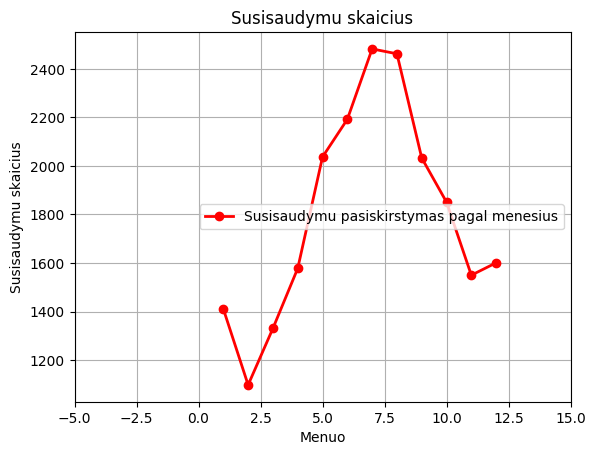

In [62]:
months = nypd_small['MonthNr'].value_counts().sort_index(ascending=True).index
shootings = nypd_small['MonthNr'].value_counts().sort_index(ascending=True).values

langas, grafikas = plt.subplots()

grafikas.plot(months, shootings, label="Susisaudymu pasiskirstymas pagal menesius", linewidth = 2, marker = 'o', color = "red")

# grafikas.set_xticks(months) # parodo visus asies rodiklius
grafikas.set_xlim(-5, 15) # nurodo asies pradzia ir pabaiga
grafikas.grid()

grafikas.set_xlabel("Menuo")
grafikas.set_ylabel("Susisaudymu skaicius")
grafikas.set_title('Susisaudymu skaicius')

grafikas.legend()

plt.show()

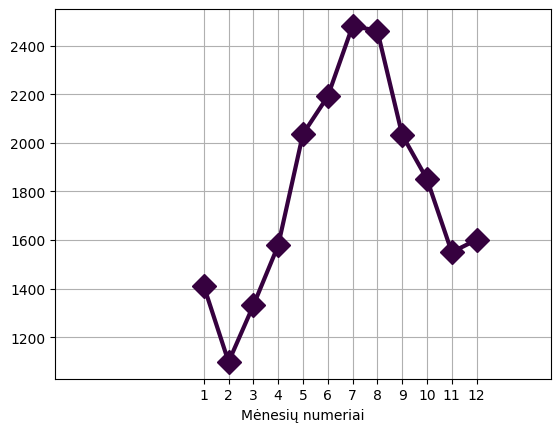

In [63]:
monts_counts = nypd_small['MonthNr'].value_counts().sort_index(ascending=True)
months = monts_counts.index
counts = monts_counts.values

fig, ax = plt.subplots()
ax.plot(months, counts, lw=3, c='xkcd:deep purple', marker='D', ms=12)

ax.set_xticks(months) #x ašies norimų skaičių palikimas
ax.set_xlim(-5, 15) #x ašies ribų keitimas
ax.grid() #tinklelio uždėjimas
ax.set_xlabel('Mėnesių numeriai')

plt.show()

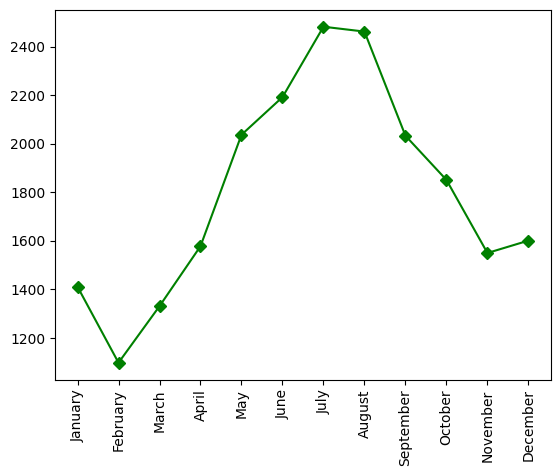

In [70]:
months = nypd_small[['MthName', 'MonthNr']].value_counts().reset_index().sort_values(by='MonthNr')
fig, ax = plt.subplots()

mnames = months['MthName'].values
mnumbers = months['MonthNr']
counts = months['count'].values

ax.plot(mnumbers, counts, marker='D', c='green')
ax.set_xticks(mnumbers)
ax.set_xticklabels(mnames, rotation=90)

plt.show()

In [69]:
nypd_small[['MthName', 'MonthNr']].value_counts().reset_index()

,MthName,MonthNr,count
0,July,7,2482
1,August,8,2462
2,June,6,2192
3,May,5,2037
4,September,9,2033
5,October,10,1851
6,December,12,1601
7,April,4,1578
8,November,11,1550
9,January,1,1411


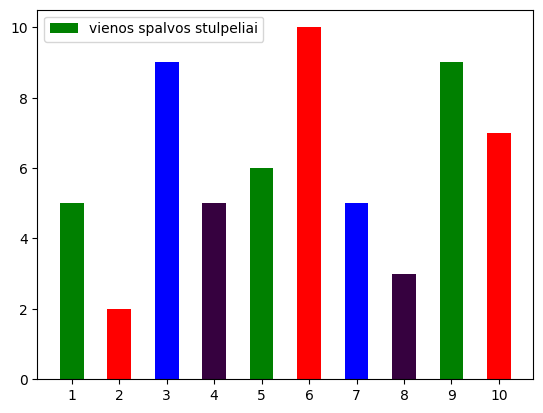

In [83]:
# bar grafikai
a = np.arange(1,11)
b = np.random.randint(1,11, 10)
color_list = ['green', 'red', 'blue', 'xkcd:deep purple']

fig, ax = plt.subplots()
ax.bar(a,b, color = color_list, width = 0.5, label = 'vienos spalvos stulpeliai')
ax.legend(loc='best')
ax.set_xticks(a)

plt.show()

In [2]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
# import mysql.connector as cnt
#import panel as pn
#pn.extension()
# import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\rezav\OneDrive\Stalinis kompiuteris\Duomenų mokslas\JupyterNotebooksR


In [ ]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(fwidth*2,fheight*2), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:


#ax1.legend(loc='best')
#ax2:
#plotting code:


#ax2.legend(loc='best')
#ax3:
#plotting code:


#ax3.legend(loc='best')
#ax4:
#plotting code:


#ax4.legend(loc='best')
fig.tight_layout()
plt.show()

In [ ]:
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:


axis.set_xlabel('X ašis', fontsize=fontsize)
axis.set_ylabel('Y ašis', fontsize=fontsize)
axis.set_title('Pavadinimas', fontsize=titlesize)
axis.tick_params(axis='x', labelsize=labelsize)
axis.tick_params(axis='y', labelsize=labelsize)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
# :imp -importavimui
# :sfig - vienam grafikui
# :fig - 1nm grafikui su daugiau kodo

In [26]:
#Nuskaitykite DUS2014csv ir DUS2018.csv į pandas lenteles

DUS2014 = pd.read_csv('DUS2014.csv')
DUS2014.head(5)

DUS2018 = pd.read_csv('DUS2018.csv')
DUS2014.head(5)

# .query(), .value_counts():
# Kiek dalyvavo vyrų, moterų apklausoje kiekvienais metais. Suraskite pokytį,
# rezultatus išspausdinkite

dus2014M = DUS2014.query('lytis == "M"')
VyruSk14 = dus2014M['lytis'].value_counts().values[0] #

dus2018M = DUS2018.query('lytis == "M"')
VyruSk18 = dus2018M['lytis'].value_counts().values[0]

VyruSkPokytis = VyruSk18 - VyruSk14
print('Vyru skaiciaus pokytis', VyruSkPokytis)


dus2014F = DUS2014.query('lytis == "F"')
MoteruSk14 = dus2014F['lytis'].value_counts().values[0] #

dus2018F = DUS2018.query('lytis == "F"')
MoteruSk18 = dus2018F['lytis'].value_counts().values[0]

MoteruSkPokytis = MoteruSk18 - MoteruSk14
print('Moteru skaiciaus pokytis', MoteruSkPokytis)



Vyru skaiciaus pokytis -110
Moteru skaiciaus pokytis -1678


In [ ]:
# Kiek dalyvavo vyrų, moterų apklausoje kiekvienais metais. Suraskite pokytį,
# rezultatus išspausdinkite
moterys_2014 = d14s[d14s["lytis"]=="F"] 
vyrai_2014 = d14s[d14s["lytis"]=="M"] 
moteru_sk_2014 = moterys_2014['lytis'].value_counts().values[0] # 
vyru_sk_2014 = vyrai_2014['lytis'].value_counts().values[0]
moterys_2018 = d18s[d18s["lytis"]=="F"] 
vyrai_2018 = d18s[d18s["lytis"]=="M"]
moteru_sk_2018 = moterys_2018['lytis'].value_counts().values[0]
vyru_sk_2018 = vyrai_2018['lytis'].value_counts().values[0]
moteru_sk_pokytis = moteru_sk_2018-moteru_sk_2014
vyru_sk_pokytis = vyru_sk_2018-vyru_sk_2014

In [46]:
# kiek 2018 metais buvo respondentų iš kiekvienos amžiaus grupės?
Gr14_29 = DUS2018.query('amzius == "14-29"')
Gr30_30 = DUS2018.query('amzius == "30-39"')
Gr40_49 = DUS2018.query('amzius == "40-49"')
Gr50_59 = DUS2018.query('amzius == "50-59"')
GrVirs60 = DUS2018.query('amzius == "60+"')

DUS2018['amzius'].value_counts().sort_index(ascending=True)

amziaus_grupes = DUS2018['amzius'].value_counts().index # cia tampa indekso sarasu
print(amziaus_grupes)
    
# kiek 2018 metais buvo respondentų iš kiekvienos amžiaus grupės?
for grupe in amziaus_grupes:
    amziaus_grupes_lentele = DUS2018.query('amzius == @grupe')
    vidutinis_atlyginimas = amziaus_grupes_lentele['bdu_spalio'].mean()
    print('Amžiaus grupė: ', grupe, ' vidutinis atlyginimas: ',vidutinis_atlyginimas)
    


# Suraskite vidutinius atlyginimus kiekvienai amžiaus grupei (2018 metams)
# hint:as for ciklas moka eiti per array vertes, kurias gausite su .index arba .values atributais

Index(['50-59', '40-49', '14-29', '30-39', '60+'], dtype='object', name='amzius')
Amžiaus grupė:  50-59  vidutinis atlyginimas:  856.0671241050119
Amžiaus grupė:  40-49  vidutinis atlyginimas:  980.8554293599406
Amžiaus grupė:  14-29  vidutinis atlyginimas:  865.5633005977796
Amžiaus grupė:  30-39  vidutinis atlyginimas:  1088.9557207498383
Amžiaus grupė:  60+  vidutinis atlyginimas:  784.542386341076


In [52]:
DUS2018['issilavinimas'].value_counts()

IssilavinimoGrSarasas = DUS2018['issilavinimas'].value_counts().sort_index(ascending=True).index
    
for grupe in IssilavinimoGrSarasas:
    Issilavinimo_grupes_lentele = DUS2018.query('issilavinimas == @grupe')
    vidutinis_atlyginimas = Issilavinimo_grupes_lentele['bdu_spalio'].mean()
    print('Issilavinimo grupė: ', grupe, ' vidutinis atlyginimas: ',vidutinis_atlyginimas)

Issilavinimo grupė:  G1  vidutinis atlyginimas:  626.3916786226686
Issilavinimo grupė:  G2  vidutinis atlyginimas:  732.6871572212066


Issilavinimo grupė:  G3  vidutinis atlyginimas:  1094.7640256572408
Issilavinimo grupė:  G4  vidutinis atlyginimas:  1246.4511960095226


In [34]:
DUS2018['amzius'].value_counts()

amzius
50-59    10056
40-49     9421
14-29     9368
30-39     9282
60+       5037
Name: count, dtype: int64

In [32]:
DUS2018 = pd.read_csv('DUS2018.csv')
DUS2018.head(5)

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,sutartis,apmoketos_val,bdu_val,nuts,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,25.57,0,100,XC,0,1_49,40-49,20,A,0,...,N,183,2.51,LT,0,146,460,0,1,G2
1,25.05,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.13,LT,0,132,1487,0,2,G2
2,25.44,13,100,XC,0,1_49,40-49,26,A,0,...,N,183,8.20,LT,0,132,1500,0,3,G2
3,24.91,13,100,XC,0,1_49,50-59,26,A,0,...,N,183,8.20,LT,0,132,1500,0,4,G2
4,24.51,18,100,XM,1,50_249,40-49,24,A,0,...,N,183,2.19,LT,0,0,400,0,5,G2


Moteru BDU vidurkis 832.1469450889405
Vyru BDU vidurkis 1014.4962626801922


In [75]:
DUS2018 = pd.read_csv('DUS2018.csv')

BduF = DUS2018.query('lytis == "F"')['bdu_spalio'].mean()
BduM = DUS2018.query('lytis == "M"')['bdu_spalio'].mean()
BduBendras = DUS2018['bdu_spalio'].mean()

# Kiek procentais vyrai uždirba daugiau, nei bendras atlyginimų vidurkis?
BduMProcBendras = 100 * ((BduM - BduBendras) / BduBendras)
print('Vyrai uzdirba ',BduMProcBendras, '% daugiau nei vidurkis')



Vyrai uzdirba  9.427035640478195 % daugiau nei vidurkis


In [77]:
# Kiek procentais moterys uždirba mažiau, nei bendras atlyginimų vidurkis?
BduFProcBendras = 100 * ((BduF - BduBendras) / BduBendras)
print('Moterys uzdirba ',BduFProcBendras, '% daugiau nei vidurkis')


Vyrai uzdirba  -10.24178524049633 % daugiau nei vidurkis


In [79]:
# Nuskaitykite aruodas.csv failą
DfAruodas = pd.read_csv('aruodas.csv')
DfAruodas.head(5)



,Unnamed: 0,Linkas,Adresas,Kaina,€/S,Aukštas,Plotas,Kambariai
0,0,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",155 000 €,3690€/m²,4/4,42.00,2
1,1,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Pavilnionių g.",125 880 €,2977€/m²,4/4,42.28,2
2,2,https://www.aruodas.lt/butai-vilniuje-lazdynel...,"Lazdynėliai, Žaibo g.",166 000 €,3773€/m²,2/4,44.00,2
3,3,https://www.aruodas.lt/butai-vilniuje-pasilaic...,"Pašilaičiai, Perkūnkiemio g.",109 900 €,3283€/m²,7/12,33.48,1
4,4,https://www.aruodas.lt/butai-vilniuje-pilaitej...,"Pilaitė, Pilkalnio g.",137 000 €,3703€/m²,4/4,37.00,2


In [82]:
f = '3690€/m²'
def vert(el):
    elF = float(el[:-4])
    return elF

ats = vert(f)
print(ats)

3690.0


In [80]:
# Pridėkite prie DataFrame'o naują stulpelį "KainaS", kur būtų skaičiai (float'ai) iš stulpelio "€/S"

def 

Aruodas['KainaS'] = [].apply()

d14s['Eurai iš funkcijos'] = d14s['bdu_spalio'].apply(ltlToEuro)

# tam panaudokite savo sukurtą funkciją, kuri tekstą verstų į float'us
# bei .apply() metodą
# Suraskite vidutinę kv. m. kainą.

#dar hint'ų - su .values gaunate array, jam, kaip ir standartiniam list'ui, galima taikyti indeksavimą []

SyntaxError: invalid syntax (1628953839.py, line 3)